In [157]:
#Pre-prep Downloads for Jupyter notebook Functioning
!pip install emoji

import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yeozuosheng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yeozuosheng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yeozuosheng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/yeozuosheng/nltk_data...


True

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import emoji
import string

import random
random.seed(20)
np.random.seed(20)

In [133]:
#read in dataset in pandas format
dataset = pd.read_csv('airlines_reviews.csv', sep=',')
dataset.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes


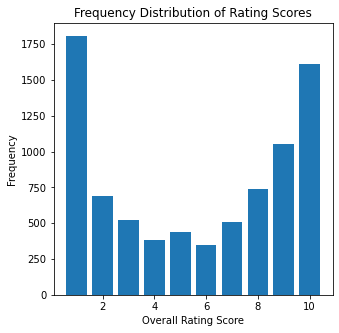

In [134]:
#Determine frequency of Overall Ratings Through Plot
freq_counts = dataset["Overall Rating"].value_counts()
rating_score = freq_counts.index

plt.figure(figsize=(5, 5))
plt.bar(rating_score, freq_counts)
plt.xlabel('Overall Rating Score')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Rating Scores')
plt.show()

In [135]:
#Create new function to convert Rating scores to 3 categories
#1-3, 4-7, 8-10 forms negative, neutral, positive [0,1,2]
def score_convert_senti(score):
    if score <= 3:
        return 0
    elif score >= 4 and score <= 7:
        return 1
    elif score >= 8:
        return 2

#Create new column, convert scoring into 3 categories
dataset["Sentiment"] = dataset["Overall Rating"].apply(score_convert_senti)

#dataset has derived sentiment column added
dataset.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Sentiment
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,2
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no,0
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes,2
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes,2
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes,2


In [136]:
#place reviews column textual data into list
reviews = dataset["Reviews"]
reviews_list = list(reviews)

In [137]:
#check for emojis
def contain_emoji(review):
    emoList = emoji.emoji_list(review)
    
    if emoList:
        return True
    
    return False


emoji_check = [contain_emoji(review) for review in reviews_list]

for i in range(len(emoji_check)):
    if emoji_check[i] == True:
        print("This is Review: " + str(i))
        print(reviews_list[i])

This is Review: 4708
  Valerie, terminal 2A, Paris CDG airport, left our hearts feeling warm with her compassion, patience and understanding whilst checking our bags. She showed us great kindness and deserves recognition for her customer service skills performed. Thank you to Valerie, if you read this, for all the small efforts which made our travels much easier while pregnant. Thank you for going above and beyond ☺️ Turkish airlines hires great assets to their company.


In [138]:
#Since emoji is present only in review 4708, de-emojize review 4708.
reviews_list_deemojize = reviews_list.copy()
reviews_list_deemojize[4708] = emoji.demojize(reviews_list_deemojize[4708], language='en')
print(reviews_list[4708])
print(reviews_list_deemojize[4708])

  Valerie, terminal 2A, Paris CDG airport, left our hearts feeling warm with her compassion, patience and understanding whilst checking our bags. She showed us great kindness and deserves recognition for her customer service skills performed. Thank you to Valerie, if you read this, for all the small efforts which made our travels much easier while pregnant. Thank you for going above and beyond ☺️ Turkish airlines hires great assets to their company.
  Valerie, terminal 2A, Paris CDG airport, left our hearts feeling warm with her compassion, patience and understanding whilst checking our bags. She showed us great kindness and deserves recognition for her customer service skills performed. Thank you to Valerie, if you read this, for all the small efforts which made our travels much easier while pregnant. Thank you for going above and beyond :smiling_face: Turkish airlines hires great assets to their company.


In [139]:
#Remove Punctuation
def remove_punc(review):
    ascii_to_translate = str.maketrans("", "", string.punctuation)
    review = review.translate(ascii_to_translate)
    return review

print(reviews_list_deemojize[4708])
reviews_list_noPunc = [remove_punc(review) for review in reviews_list_deemojize]
print(reviews_list_noPunc[4708])

  Valerie, terminal 2A, Paris CDG airport, left our hearts feeling warm with her compassion, patience and understanding whilst checking our bags. She showed us great kindness and deserves recognition for her customer service skills performed. Thank you to Valerie, if you read this, for all the small efforts which made our travels much easier while pregnant. Thank you for going above and beyond :smiling_face: Turkish airlines hires great assets to their company.
  Valerie terminal 2A Paris CDG airport left our hearts feeling warm with her compassion patience and understanding whilst checking our bags She showed us great kindness and deserves recognition for her customer service skills performed Thank you to Valerie if you read this for all the small efforts which made our travels much easier while pregnant Thank you for going above and beyond smilingface Turkish airlines hires great assets to their company


In [140]:
#Make text all lowercase
reviews_list_lower = [review.lower() for review in reviews_list_noPunc]
print(reviews_list_lower[4708])

  valerie terminal 2a paris cdg airport left our hearts feeling warm with her compassion patience and understanding whilst checking our bags she showed us great kindness and deserves recognition for her customer service skills performed thank you to valerie if you read this for all the small efforts which made our travels much easier while pregnant thank you for going above and beyond smilingface turkish airlines hires great assets to their company


In [142]:
#Tokenization
rev_tokenized = [word_tokenize(review) for review in reviews_list_lower]

In [143]:
print(rev_tokenized[4708])

['valerie', 'terminal', '2a', 'paris', 'cdg', 'airport', 'left', 'our', 'hearts', 'feeling', 'warm', 'with', 'her', 'compassion', 'patience', 'and', 'understanding', 'whilst', 'checking', 'our', 'bags', 'she', 'showed', 'us', 'great', 'kindness', 'and', 'deserves', 'recognition', 'for', 'her', 'customer', 'service', 'skills', 'performed', 'thank', 'you', 'to', 'valerie', 'if', 'you', 'read', 'this', 'for', 'all', 'the', 'small', 'efforts', 'which', 'made', 'our', 'travels', 'much', 'easier', 'while', 'pregnant', 'thank', 'you', 'for', 'going', 'above', 'and', 'beyond', 'smilingface', 'turkish', 'airlines', 'hires', 'great', 'assets', 'to', 'their', 'company']


In [151]:
#Stop word removal
def stop_word_remover(review):
    stop_words_list = list(stopwords.words("english"))
    #print(stop_words_list)
    filtered_review = [text for text in review if text not in stop_words_list]
    return filtered_review

rev_null_stopword = [stop_word_remover(review) for review in rev_tokenized]

In [152]:
print(rev_null_stopword[4708])

['valerie', 'terminal', '2a', 'paris', 'cdg', 'airport', 'left', 'hearts', 'feeling', 'warm', 'compassion', 'patience', 'understanding', 'whilst', 'checking', 'bags', 'showed', 'us', 'great', 'kindness', 'deserves', 'recognition', 'customer', 'service', 'skills', 'performed', 'thank', 'valerie', 'read', 'small', 'efforts', 'made', 'travels', 'much', 'easier', 'pregnant', 'thank', 'going', 'beyond', 'smilingface', 'turkish', 'airlines', 'hires', 'great', 'assets', 'company']


In [168]:
#Lemmatization of text. => Not much better than original text.
#Use word embedding instead. 

#lemmatizer = WordNetLemmatizer()
#reviews_preprocessed = []

#for tokReview in rev_null_stopword:
    #review = []
    #for tok in tokReview:
        #newtok = lemmatizer.lemmatize(tok)
        #review.append(newtok)
    #reviews_preprocessed.append(review)

In [167]:
#print(reviews_preprocessed[4708])